All imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import linregress

1: Movie Reviews

In [3]:
movies = pd.read_csv('fandango_score_comparison.csv')
print(movies.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

2: Histograms

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

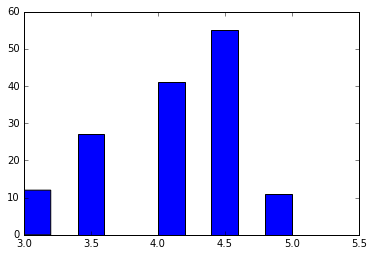

In [6]:
plt.hist(movies['Fandango_Stars'])

3: Mean, Median, And Standard Deviation

In [9]:
f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()

f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()

f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()

print(f_mean)
print(m_mean)

print(f_median)
print(m_median)

print(f_std)
print(m_std)

4.08904109589
2.97260273973
4.0
3.0
0.540385977979
0.990960561374


4: Scatter Plots

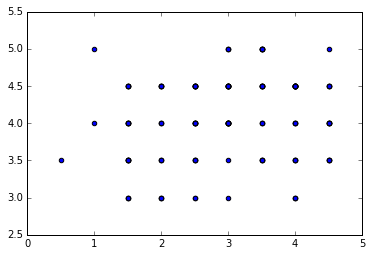

In [10]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [11]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] \
                              - movies["Fandango_Stars"])

In [12]:
movies.sort_values(by="fm_diff", ascending=False).head(5)

FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user_norm_round  \
3            4.20   ...               1.0                 4.0   
85           4.05   ...               1.0                 4.0   
47           3.05   ...               1.5                 3.0   
19           2.70   ...               1.0                 2.5   
134          3.65   ...               1.5                 3.5   

     Metacritic_norm_round  Metacritic_user_norm_round  IMDB_norm_round  \
3                      1.0                         2.5              2.5   
85                     1.5                         3.0              3.5   
47                     1.5                         2.5              2.5   
19                     1.5                         2.5              3.0   
134                    1.5                         2.5              3.5   

     Metacritic_user_vote_count  IMDB_user_vote_count  Fandango_votes  \
3                            31                  3136            1793   
85                           38                  5927             811   
47                          108                 19222            6835   
19                          246                 19521            3886   
134                          49                 25214            2603   

     Fandango_Difference  fm_diff  
3                    0.5      4.0  
85                   0.2      3.0  
47                   0.3      3.0  
19                   0.4      3.0  
134                  0.0      3.0  

[5 rows x 23 columns]

5: Correlations

In [14]:
r_value = pearsonr(movies["Fandango_Stars"], \
                   movies["Metacritic_norm_round"])

In [20]:
slope, intercept, r_value, p_value, stderr_slope = \
linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [22]:
pred_3 = 3 * slope + intercept
pred_3

4.0917071528212041

6: Finding Residuals

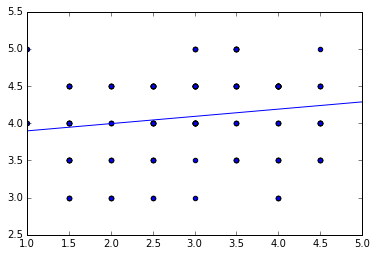

In [23]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5]) # values for x = [1,5], y = [pred_1,]
plt.xlim(1,5)
plt.show()